In [1]:
# Modules

# Load module to create Panda DataFrames in Jupyter Notebooks
import pandas as pd
# Load module to create and format various plots
import matplotlib.pyplot as plt
# Load module to handle high-level math functions and basic algebraz
import numpy as np
# Load module to allow communication with HTTPS for API requests
import requests
# Load module that deserializes java script open notation into Jupyter Notebooks
import json
# Load module that returns the number of seconds passed since epoch 
import time
# Load module that contains probability distributions and statistical functions
from scipy.stats import linregress
# Load module for plot aesthetics
import seaborn as sns

In [2]:
# Fertility CSV:

# Define variable name that holds csv file location of the fertility rates
fertility_csv = "csv_files/Age-specific fertility rates, Total fertility and .csv"
# Define variable name the holds the read information from the csv file
fertility_csv_dataframe = pd.read_csv(fertility_csv)
# Print to screen in Pandas DataFrame the read csv information
fertility_csv_dataframe.head()

,"United Nations, Department of Economic and Social Affairs",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,"Population Division, Fertility and Family Plan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World Fertility Data 2012\nAGE-SPECIFIC FERTIL...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country,ISO code,Period,Reference,NaN,Total fertility,Age-specific fertility rates,NaN,NaN,NaN,...,NaN,NaN,Mean age at childbearing,Source type,Source,Survey name,Note on country or population,Note on age,Note on methods,Note on population data used in denominator
3,NaN,NaN,NaN,Year,Period,NaN,15-19,20-24,25-29,30-34,...,40-44,45-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,4,Around 1970,1973,1972-1973,8.21,168,359,355,307,...,137,81,30,Survey,National statistics,Afghanistan 1972-1974 National Demographic and...,NaN,NaN,NaN,NaN


In [3]:
# Clean:

# Define variable name that holds drop column information
fertility_clean = fertility_csv_dataframe.drop([0, 1])
# Use pandas column rename function (.columns) to rename the columns in the dataframe
fertility_clean.columns= ['Country', 'ISO Code', 'Period', 'Reference Year', 'Period', 'Total Fertility',
                          'Age-specific fertility rates: 15-19','Age-specific fertility rates: 20-24',
                          'Age-specific fertility rates: 25-29', 'Age-specific fertility rates: 30-34',
                         'Age-specific fertility rates: 35-39','Age-specific fertility rates: 40-44',
                          'Age-specific fertility rates: 45-49', 'Mean Age at Childbearing', 'D1', 'D2', 'D3','D4','D5','D6','D7']
# Drop additional columns from the already cleaned variable
fertility_clean = fertility_clean.drop(columns=['Period','D1','D2','D3','D4','D5','D6','D7'])
fertility_clean = fertility_clean.drop([2, 3])

# Print to screen the cleaned data variable 'fertility_clean'
fertility_clean

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,..,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Zimbabwe,716,1969,6.74,79,272,304,257,218,145,73,31.2
1073,Zimbabwe,716,1987,5.42,102,251,250,212,158,80,32,29.5
1074,Zimbabwe,716,1998,3.98,112,199,180,135,108,46,15,28.3
1075,Zimbabwe,716,2004,3.8,99,205,172,144,86,42,13,28.1


In [4]:
# Sort:

#Removes rows that are missing data in Total Fertility and Mean Age at Childbearing
fertility_clean = fertility_clean.loc[fertility_clean['Total Fertility'] != '..']
fertility_clean = fertility_clean.loc[fertility_clean['Mean Age at Childbearing'] != '..']

#Changes data type to float for Total Fertility and Mean Age at Childbearing to allow for math based analysis
fertility_clean['Total Fertility']=fertility_clean['Total Fertility'].astype(float)
fertility_clean['Mean Age at Childbearing']=fertility_clean['Mean Age at Childbearing'].astype(float)

#Export to CSV file to allow for use in other notebook
fertility_clean.to_csv ("clean_data/fertility_clean.csv", index = False, header=True)

#prints DataFrame
fertility_clean

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30.0
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,..,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Zimbabwe,716,1969,6.74,79,272,304,257,218,145,73,31.2
1073,Zimbabwe,716,1987,5.42,102,251,250,212,158,80,32,29.5
1074,Zimbabwe,716,1998,3.98,112,199,180,135,108,46,15,28.3
1075,Zimbabwe,716,2004,3.80,99,205,172,144,86,42,13,28.1


In [5]:
# Literacy CSV:

# Define variable name that holds the csv file location of the literacy rates
file_literacy = "csv_files/literacy-rate-adults.csv"
# Define variable name that holds the read information from the csv
literacy_df = pd.read_csv(file_literacy)
# Print to screen, in Pandas DataFrame, the read csv information
literacy_df

,Entity,Code,Year,"Literacy rate, adult total (% of people ages 15 and above)"
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299
...,...,...,...,...
2221,Zambia,ZMB,2010,83.007668
2222,Zimbabwe,ZWE,1982,77.794167
2223,Zimbabwe,ZWE,1992,83.512581
2224,Zimbabwe,ZWE,2011,83.582710


In [6]:
# Change Name:

#Change column names in literacy data frame to match fertility data frame 
literacy_df.columns = ["Country", "Code", "Reference Year", "Literacy Rate"]
#Change reference year to string
literacy_df['Reference Year']=literacy_df['Reference Year'].astype(str)

literacy_df

,Country,Code,Reference Year,Literacy Rate
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299
...,...,...,...,...
2221,Zambia,ZMB,2010,83.007668
2222,Zimbabwe,ZWE,1982,77.794167
2223,Zimbabwe,ZWE,1992,83.512581
2224,Zimbabwe,ZWE,2011,83.582710


In [7]:
# Merge:

# Create DataFrame that has Country, Total Fertility and Literacy Rate by merging on Country and Reference Year
correlation_df = fertility_clean.merge(literacy_df, on=['Country','Reference Year'], how='inner')

# Change Total Fetility to float to allow for math based analysis
correlation_df['Total Fertility']=correlation_df['Total Fertility'].astype(float)

# Change ISO Code to float for later merging
correlation_df['ISO Code']=correlation_df['ISO Code'].astype(float)

# Export Data
correlation_df.to_csv ("clean_data/fertility_literacy.csv", index = False, header=True)

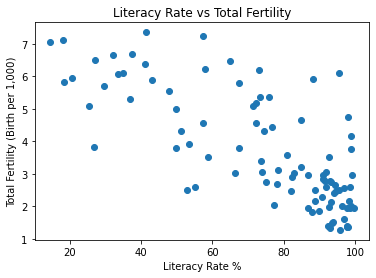

In [8]:
# Scatter Plot:

# Use Matplotlib to create scatter plot and format
plt.scatter(correlation_df["Literacy Rate"], correlation_df["Total Fertility"], marker="o")

# Create a unique plot title
plt.title('Literacy Rate vs Total Fertility')

# Create a lable for the y axis
plt.ylabel("Total Fertility (Birth per 1,000)")

# Create a lable for the x axis
plt.xlabel("Literacy Rate %")

# Save a png image of the scatter plot to local folder
plt.savefig('literacy_rates_vs_total_fertility')

# Print scatter plot to screen
plt.show()

#### Scatter Plot Observation:
This is a scatter plot that shows the correlation between the total fertility of births per thousand and the overall literacy rate.  It looks like there is some correlation between the two as the fertility datapoints decrease as the literacty rate increases.  We might be able to get more data points to confirm this.

In [9]:
# Linear Regression Passthrough:

# Use Python define function (def) to start a linear regression function 
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
    print(f"Intercept: {intercept}")
    literacy_rate_opt = (2.1-intercept)/slope
    print(f"Literacy Rate: {literacy_rate_opt}")
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=20,color="black")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

The r-squared is: -0.7489005930271825
Intercept: 7.657954805495637
Literacy Rate: 104.44400404158473


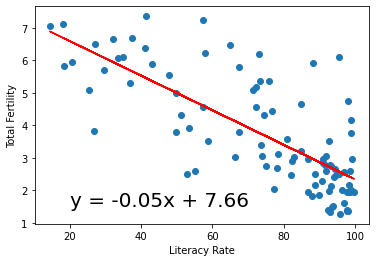

In [10]:
xlbl = "Literacy Rate"
ylbl = "Total Fertility"
lblpos = (20,1.5)
plotLinearRegression(correlation_df[xlbl],correlation_df[ylbl],xlbl,ylbl,lblpos)

#### Linear Regression Observation:
This linear regression line shows that there is a strong correlation between the fertility rate and literacy rates.  It might be helpful to compare other factors to the fertility rate such as age, country and income to see how they compare.

### What are the countries with high literacy and high fertility

In [11]:
# Outliers were noted in the scatter plot with high literacy and high fertility
# Seperate DataFrame created to locate these outliers
outliers_df=correlation_df.loc[correlation_df["Literacy Rate"]>80]
outliers_df=outliers_df.loc[outliers_df["Total Fertility"]>4]
outliers_df

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Literacy Rate
25,Equatorial Guinea,226.0,2000,5.92,196,256,252,208,187,54,31,28.4,GNQ,88.308296
65,Saint Vincent and the Grenadines,670.0,1970,6.11,181,345,286,217,136,52,6,27.3,VCT,95.632156
66,Samoa,882.0,1991,4.76,25,159,241,216,175,98,38,31.7,WSM,97.944328
69,Sao Tome and Principe,678.0,2001,4.66,91,216,202,185,154,64,20,29.5,STP,84.908508
84,Tonga,776.0,1996,4.16,17,160,239,209,139,59,8,30.5,TON,98.905373


## Defining Data by Replacement Rate

In [12]:
#Replacement rate is the level of fertility where a countries population stays constant

#Seperate the countries on a fertility rate of 2.1 using original cleaned fertility data
below_replacement=fertility_clean.loc[fertility_clean["Total Fertility"]<2.1]
above_replacement=fertility_clean.loc[fertility_clean["Total Fertility"]>2.1]

#Remove all rows for countries except for highest reference year.
last_below_rep=below_replacement.sort_values('Reference Year', ascending=False).drop_duplicates(['Country'])
last_ab_rep=above_replacement.sort_values('Reference Year', ascending=False).drop_duplicates(['Country'])
last_ab_rep

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
859,Seychelles,690,2011,2.54,78,124,123,110,55,19,..,27.5
321,Ethiopia,231,2010,4.80,79,207,237,192,150,68,28,29.8
516,Kyrgyzstan,417,2010,3.13,34,176,183,136,71,22,3,28.4
84,Bangladesh,50,2010,2.32,118,153,107,56,21,6,3,24.7
739,Panama,591,2010,2.40,86,133,117,85,45,12,1,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Belgium,56,1970,2.24,31,149,143,78,36,10,1,27.2
865,Singapore,702,1970,3.10,26,139,210,138,75,27,5,29.1
123,Bosnia and Herzegovina,70,1970,2.65,44,174,142,93,54,21,2,27.6
820,Saint Pierre and Miquelon,666,1969,3.79,95,200,172,127,98,67,0,28.4


The r-squared is: -0.10768225593081858
Intercept: 29.82874060554283
Literacy Rate: 47.00020620049583


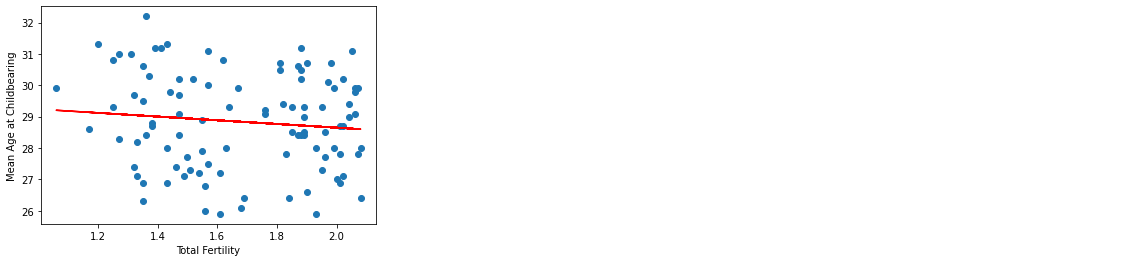

In [13]:
xlbl = "Total Fertility"
ylbl = "Mean Age at Childbearing"
lblpos = (4,26)
plotLinearRegression(last_below_rep[xlbl],last_below_rep[ylbl],xlbl,ylbl,lblpos)

The r-squared is: 0.450553948294075
Intercept: 26.508300932200964
Literacy Rate: -43.457920654357316


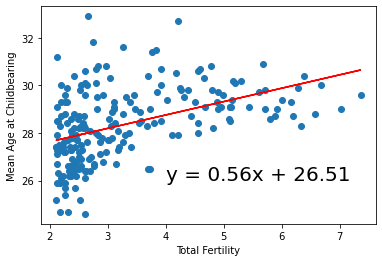

In [14]:
xlbl = "Total Fertility"
ylbl = "Mean Age at Childbearing"
lblpos = (4,26)
plotLinearRegression(last_ab_rep[xlbl],last_ab_rep[ylbl],xlbl,ylbl,lblpos)

In [15]:
#add Replacement Fertility Rate column to above and below replacement data frames then concatinate them together
last_below_rep["Replacement Fertility Rate"]='Below 2.1'
last_ab_rep["Replacement Fertility Rate"]='Above 2.1'
replacement_df = pd.concat([last_ab_rep, last_below_rep])
replacement_df.to_csv ("clean_data/replacement.csv", index = False, header=True)

## Defining Data by Continent

In [16]:
cont= "csv_files/country-and-continent-codes-list-csv.csv"
continents_df = pd.read_csv(cont)
continents_df = continents_df.drop(columns=['Continent_Code','Two_Letter_Country_Code','Three_Letter_Country_Code','Country_Name'])
continents_df.columns = ['Continent', 'ISO Code']
continents_df

,Continent,ISO Code
0,Asia,4.0
1,Europe,8.0
2,Antarctica,10.0
3,Africa,12.0
4,Oceania,16.0
...,...,...
257,Africa,894.0
258,Oceania,NaN
259,Asia,NaN
260,Asia,NaN


In [17]:
corrWcon_df = correlation_df.merge(continents_df, on=['ISO Code'], copy= False)
corrWcon_df = corrWcon_df.drop_duplicates(subset=['Country', 'Reference Year'])
corrWcon_df.to_csv ("clean_data/fertility_continents.csv", index = False, header=True)
corrWcon_df

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Literacy Rate,Continent
0,Afghanistan,4.0,1979,7.11,105,260,309,301,262,185,..,30.7,AFG,18.157681,Asia
1,Algeria,12.0,2008,2.74,9,75,139,149,118,51,8,31.8,DZA,75.136047,Africa
2,Angola,24.0,2001,5.79,122,270,262,217,190,62,35,29.3,AGO,67.405418,Africa
3,Antigua and Barbuda,28.0,2001,2.01,67,94,88,79,56,19,1,27.8,ATG,98.949997,North America
4,Aruba,533.0,2010,1.61,40,92,86,68,29,8,0,27.2,ABW,96.822639,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Uruguay,858.0,1985,2.49,56,130,137,100,56,18,2,27.8,URY,95.379982,South America
93,Uruguay,858.0,1996,2.55,76,128,134,100,55,16,1,27.3,URY,96.781807,South America
94,Uruguay,858.0,2007,1.96,59,92,92,86,48,12,1,27.7,URY,97.863892,South America
95,Uzbekistan,860.0,2000,2.58,21,205,161,90,31,7,1,26.8,UZB,98.642578,Asia


## Exploring Effect of Education

In [18]:
# Define variable that will replace all ".." values in the dataframe to NaN
fertility_clean.replace(r'\s+',np.nan,regex=True).replace('..',np.nan)

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30.0
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,NaN,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,NaN,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Zimbabwe,716,1969,6.74,79,272,304,257,218,145,73,31.2
1073,Zimbabwe,716,1987,5.42,102,251,250,212,158,80,32,29.5
1074,Zimbabwe,716,1998,3.98,112,199,180,135,108,46,15,28.3
1075,Zimbabwe,716,2004,3.80,99,205,172,144,86,42,13,28.1


In [19]:
# Use already defined variable and replace all "NaN" values in the dataframe to zero
fertility_clean["Age-specific fertility rates: 45-49"] = fertility_clean["Age-specific fertility rates: 45-49"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 40-44"] = fertility_clean["Age-specific fertility rates: 40-44"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 35-39"] = fertility_clean["Age-specific fertility rates: 35-39"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 30-34"] = fertility_clean["Age-specific fertility rates: 30-34"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 25-29"] = fertility_clean["Age-specific fertility rates: 25-29"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 20-24"] = fertility_clean["Age-specific fertility rates: 20-24"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 15-19"] = fertility_clean["Age-specific fertility rates: 15-19"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

fertility_clean.head()

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30.0
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,0,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,0,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7


In [20]:
# Define variable name that drops the duplicate country names 
fertility_drop_duplicate_countries = fertility_clean.sort_values('Reference Year').drop_duplicates('Country',keep='last')
fertility_drop_duplicate_countries.head()

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
821,Saint Pierre and Miquelon,666,1977,2.01,45,148,92,60,41,15,0,26.9
966,Tokelau,772,1986,3.72,40,183,219,181,67,55,0,29.0
1045,Vanuatu,548,1989,4.88,78,234,248,195,138,61,22,29.3
222,Comoros,174,1994,4.66,59,184,223,226,147,67,25,30.3
963,Togo,768,1996,5.20,89,214,246,207,166,82,37,30.1


In [21]:
# Define variable name that holds the csv file location of the literacy rates
file_literacy = "csv_files/literacy-rate-adults.csv"
# Define variable name that holds the read information from the csv
literacy_df = pd.read_csv(file_literacy)
# Print to screen, in Pandas DataFrame, the read csv information
literacy_df.head()

,Entity,Code,Year,"Literacy rate, adult total (% of people ages 15 and above)"
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299


In [22]:
# change field name in literacy rate to literacy_rate
literacy_df.columns = ["Country", "Code", "Reference Year", "Literacy Rate"]
literacy_df['Reference Year']=literacy_df['Reference Year'].astype(str)
literacy_df.head()

,Country,Code,Reference Year,Literacy Rate
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299


In [23]:
# Define variable name that holds drop duplicate countries from the literacy csv
literacy_drop_duplicate_countries = literacy_df.sort_values('Reference Year').drop_duplicates('Country',keep='last')
literacy_drop_duplicate_countries.head()

,Country,Code,Reference Year,Literacy Rate
657,Grenada,GRD,1970,97.794472
83,Barbados,BRB,1970,99.268082
1751,Saint Vincent and the Grenadines,VCT,1970,95.632156
1691,Poland,POL,1978,98.742737
715,Hungary,HUN,1980,98.858292


In [24]:
# Define variable that holds the drop duplicate country variable for both fertility and literacy
fertility_literacy_dataset = pd.merge(fertility_drop_duplicate_countries, literacy_drop_duplicate_countries, left_on="Country", right_on="Country")
fertility_literacy_dataset

,Country,ISO Code,Reference Year_x,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Reference Year_y,Literacy Rate
0,Vanuatu,548,1989,4.88,78,234,248,195,138,61,22,29.3,VUT,1999,74.000000
1,Comoros,174,1994,4.66,59,184,223,226,147,67,25,30.3,COM,2012,49.196140
2,Togo,768,1996,5.20,89,214,246,207,166,82,37,30.1,TGO,2015,63.745621
3,Gabon,266,1999,4.22,142,196,177,172,100,48,8,27.9,GAB,2012,82.283798
4,Eritrea,232,2000,4.78,77,185,204,188,167,88,46,30.8,ERI,2008,64.662971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Kuwait,414,2010,2.64,13,112,159,128,82,27,6,30.0,KWT,2015,95.685448
142,Serbia,688,2011,1.36,19,61,87,71,30,5,0,28.4,SRB,2016,98.841507
143,Greenland,304,2011,2.07,41,104,117,98,49,5,0,27.8,GRL,2015,100.000000
144,Seychelles,690,2011,2.54,78,124,123,110,55,19,0,27.5,SYC,2010,93.954231


In [25]:
# Define variable that holds the csv file path to the education spend data
percent_gdp_education_spend_file = fertility_csv = "csv_files/country_list_education_spend_by_percent_gdp.csv"
# Define variable that holds the read csv pandas dataframe information
education_spend_dataframe = pd.read_csv(percent_gdp_education_spend_file)
# Define variable that holds the names of the columns
education_spend_dataframe.columns= ['Country', 'Education Spend(% GDP)', 'Reference Year']
# Print to screen
education_spend_dataframe

,Country,Education Spend(% GDP),Reference Year
0,Cuba,12.9,2012
1,Micronesia,12.5,2015
2,Marshall Islands,12.2,2003
3,Kiribati,12.0,2001
4,Somaliland,9.6,2021
...,...,...,...
185,Zambia,1.3,2012
186,United Arab Emirates,1.3,2000
187,Central African Republic,1.2,2012
188,South Sudan,1.0,2017


In [26]:
# Define variable that holds the merged dataframes of fertility and literacy
fertility_literacy_education_spend = pd.merge(fertility_literacy_dataset, education_spend_dataframe, left_on="Country", right_on="Country")
# Rename the various reference year columns
fertility_literacy_education_spend=fertility_literacy_education_spend.rename(columns={'Reference Year_x' : "Fertility_ref_Year", 'Reference Year_y' : "Literacy_ref_Year", 'Reference Year' : "%Spend_ref_Year"})
# Drop that are not used for this dataset
fertility_literacy_education_spend = fertility_literacy_education_spend.drop(columns=['Age-specific fertility rates: 15-19','Age-specific fertility rates: 20-24','Age-specific fertility rates: 25-29','Age-specific fertility rates: 30-34','Age-specific fertility rates: 35-39','Age-specific fertility rates: 40-44','Age-specific fertility rates: 45-49'])
# Save dataframe to CSV file
fertility_literacy_education_spend.to_csv("csv_files/fertility_literacy_education_spend.csv", index=False, header=True)


### Top Tens

In [27]:
# Define variable that holds the top ten to total fertility

top_ten_fertility = fertility_literacy_education_spend.sort_values(['Total Fertility', 'Country'], ascending=False).groupby('Total Fertility').head(5)
top_ten_fertility.head(5)

,Country,ISO Code,Fertility_ref_Year,Total Fertility,Mean Age at Childbearing,Code,Literacy_ref_Year,Literacy Rate,Education Spend(% GDP),%Spend_ref_Year
6,Guinea-Bissau,624,2000,7.36,29.6,GNB,2014,45.581161,2.1,2012
20,Niger,562,2004,7.02,29.0,NER,2012,15.456700,3.5,2017
27,Mali,466,2005,6.57,28.8,MLI,2015,33.068890,3.1,2016
84,Burundi,108,2009,6.38,30.4,BDI,2014,61.569729,4.8,2017
15,Chad,148,2003,6.34,28.3,TCD,2016,22.311550,2.9,2013


In [28]:
# Mathew's Top Ten Literacy from merge:

top_ten_literacy = fertility_literacy_education_spend.sort_values(['Literacy Rate', 'Country'], ascending=False).groupby('Literacy Rate').head(5)
top_ten_literacy.head(5)

,Country,ISO Code,Fertility_ref_Year,Total Fertility,Mean Age at Childbearing,Code,Literacy_ref_Year,Literacy Rate,Education Spend(% GDP),%Spend_ref_Year
127,Andorra,20,2010,1.25,30.8,AND,2016,100.000000,3.2,2012
39,Uzbekistan,860,2006,2.44,26.7,UZB,2015,99.983833,6.3,2017
61,Ukraine,804,2007,1.35,26.3,UKR,2012,99.974350,5.4,2017
131,Latvia,428,2010,1.17,28.6,LVA,2011,99.895897,4.7,2016
102,Estonia,233,2010,1.64,29.3,EST,2011,99.885788,5.2,2016


In [29]:
# Mathew's Top Ten Education Spend from merge:

top_ten_education_spend = fertility_literacy_education_spend.sort_values(['Education Spend(% GDP)', 'Country'], ascending=False).groupby('Education Spend(% GDP)').head(5)
top_ten_education_spend.head(5)

,Country,ISO Code,Fertility_ref_Year,Total Fertility,Mean Age at Childbearing,Code,Literacy_ref_Year,Literacy Rate,Education Spend(% GDP),%Spend_ref_Year
103,Cuba,192,2010,1.68,26.1,CUB,2012,99.752533,12.9,2012
44,Marshall Islands,584,2006,3.73,26.5,MHL,2011,98.265083,12.2,2003
25,Namibia,516,2005,3.56,28.9,NAM,2011,88.274628,8.4,2012
50,Botswana,72,2006,3.18,28.1,BWA,2003,81.188713,7.8,2012
32,Palau,585,2005,2.02,28.7,PLW,2015,96.593742,7.6,2002


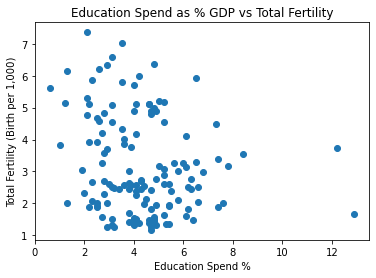

In [30]:
# Mathew's Scatterplot Updated Datapoints (137):

# Use Matplotlib to create scatter plot and format
plt.scatter(fertility_literacy_education_spend["Education Spend(% GDP)"],
           fertility_literacy_education_spend["Total Fertility"], marker="o")
# Create a unique plot title
plt.title('Education Spend as % GDP vs Total Fertility')
# Create a lable for the y axis
plt.ylabel("Total Fertility (Birth per 1,000)")
# Create a lable for the x axis
plt.xlabel("Education Spend %")
# Save a png image of the scatter plot to local folder
plt.savefig('education_spend_vs_total_fertility')
# Print scatter plot to screen
plt.show()

### Mean Fertility Rates amoung Age Specific Groups

In [31]:
# Mathew's Age Specific DataFrame Mean:

# Define variables the will hold the mean values for age specific columns
age_15_19 = fertility_literacy_dataset["Age-specific fertility rates: 15-19"].mean()
age_20_24 = fertility_literacy_dataset["Age-specific fertility rates: 20-24"].mean()
age_25_29 = fertility_literacy_dataset["Age-specific fertility rates: 25-29"].mean()
age_30_34 = fertility_literacy_dataset["Age-specific fertility rates: 30-34"].mean()
age_35_39 = fertility_literacy_dataset["Age-specific fertility rates: 35-39"].mean()
age_40_44 = fertility_literacy_dataset["Age-specific fertility rates: 40-44"].mean()
age_45_49 = fertility_literacy_dataset["Age-specific fertility rates: 45-49"].mean()

bar_chart_dataframe = pd.DataFrame({"Age 15-19":[age_15_19], "Age 20-24":[age_20_24], "Age 25-29":[age_25_29],
                                   "Age 30-34":[age_30_34], "Age 35-39":[age_35_39], "Age 40-44":[age_40_44], "Age 45-49":[age_45_49]}) 
bar_chart_dataframe

,Age 15-19,Age 20-24,Age 25-29,Age 30-34,Age 35-39,Age 40-44,Age 45-49
0,62.541096,144.80137,158.390411,129.650685,83.835616,34.945205,10.034247


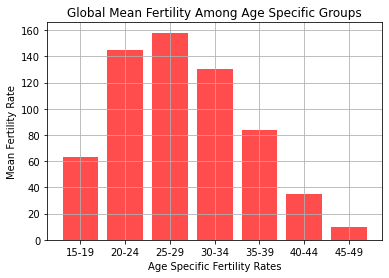

In [32]:
# Mathew's Age Specific Mean Bar Chart:

# Define base chart properties
# Define variable for the name of the cities "city_names"
age_specific_fertility = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49"]
# Define variable for plot points that correspond to the city names
age_specific_mean = [63, 145, 158, 130, 84, 35, 10]
# Use numpy libraries built in function arange (np.arange) to build a graph
x_axis_age_specific = np.arange(len(age_specific_mean))
plt.bar(x_axis_age_specific, age_specific_mean, color="r", alpha=0.7, align="center")
plt.grid()
# Define variable that holds tick value placement in a chart on x_axis_np chart
chart_ticks = [value for value in x_axis_age_specific]
# Now, use the function to call the defined variables "chart_ticks" and "city_names"
plt.xticks(chart_ticks, age_specific_fertility)
plt.title("Global Mean Fertility Among Age Specific Groups")
plt.xlabel("Age Specific Fertility Rates")
plt.ylabel("Mean Fertility Rate")
plt.savefig('Mean_Fertility_Rate_All_Countries')
plt.show()

In [33]:
country_df = pd.read_csv('country capitals coordinates.csv')
fertility_rates_df = pd.read_csv('csv_files/Age-specific fertility rates, Total fertility and .csv')
total_fertility_df = fertility_rates_df.loc[:, ["United Nations, Department of Economic and Social Affairs", "Unnamed: 5"]]
total_fertility_clean = total_fertility_df.loc[4:1074, "United Nations, Department of Economic and Social Affairs":"Unnamed: 5"]
total_fertility_renamed = total_fertility_clean.rename(columns={"United Nations, Department of Economic and Social Affairs": "country", "Unnamed: 5": "fertility"})
clean_total_fertility = total_fertility_renamed.loc[total_fertility_renamed['fertility'] != '..']
clean_total_fertility["fertility"] = clean_total_fertility["fertility"].astype('float')
total_fertility_groups = clean_total_fertility.groupby(["country"])
unique_countries_fertility = total_fertility_groups["fertility"].mean()
unique_countries_fertility = unique_countries_fertility.reset_index()
combined_data_df = unique_countries_fertility.merge(country_df, left_on="country", right_on="CountryName")
fertility = combined_data_df["fertility"]
combined_data_df["CapitalLatitude"] = combined_data_df["CapitalLatitude"].astype('float')
combined_data_df["CapitalLongitude"] = combined_data_df["CapitalLongitude"].astype('float')
capitals = combined_data_df[["CapitalLatitude", "CapitalLongitude"]]
capitals_df = capitals.dropna(how='any')

<ipython-input-33-efe98bd47219>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_total_fertility["fertility"] = clean_total_fertility["fertility"].astype('float')


NameError: name 'gmaps' is not defined